In [1]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd
import pylab

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pyparsing.py:3168: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
df = pd.read_excel('108-phase-powers-v2.xlsx')

In [3]:
df.shape

(1938, 921)

In [4]:
df.head()

,Unnamed: 0,AF3_beta_phase,AF3_beta_power,AF3_gamma_phase,AF3_gamma_power,AF3_high_beta_phase,AF3_high_beta_power,AF3_high_gamma_phase,AF3_high_gamma_power,AF3_low_beta_phase,...,cmap,exp,mep_by_cmap,mep_cat_abs,mep_cat_cmap,mep_cat_percentile,mep_size,run,sub,trial_num
0,0,1.428832,-57.824963,-0.711762,-66.336084,-2.342277,-58.995625,0.377453,-67.774819,-2.209596,...,0.00744,exp01,343.423853,1,1,1,2.555237,SP 110RMT r1,sub03,0
1,1,1.207595,-63.209878,1.089213,-69.298822,0.910096,-64.221493,1.235293,-71.342501,-1.770560,...,0.00744,exp01,120.175776,1,0,0,0.894165,SP 110RMT r1,sub03,1
2,2,-1.635179,-62.122791,0.898665,-63.363832,-1.725530,-63.198953,1.087354,-63.735303,-3.004190,...,0.00744,exp01,80.739322,1,0,0,0.600739,SP 110RMT r1,sub03,2
3,3,-3.062924,-57.084814,-1.673935,-61.405880,-2.197109,-59.052716,1.663156,-59.389577,-0.542549,...,0.00744,exp01,85.599629,1,0,0,0.636902,SP 110RMT r1,sub03,3
4,4,-2.133858,-53.955623,-1.092259,-61.044480,-2.306246,-54.808586,-0.396410,-62.453035,1.247554,...,0.00744,exp01,80.370125,1,0,0,0.597992,SP 110RMT r1,sub03,4


In [5]:
df.columns.values

array(['Unnamed: 0', 'AF3_beta_phase', 'AF3_beta_power',
       'AF3_gamma_phase', 'AF3_gamma_power', 'AF3_high_beta_phase',
       'AF3_high_beta_power', 'AF3_high_gamma_phase',
       'AF3_high_gamma_power', 'AF3_low_beta_phase', 'AF3_low_beta_power',
       'AF3_low_gamma_phase', 'AF3_low_gamma_power', 'AF3_mu_phase',
       'AF3_mu_power', 'AF4_beta_phase', 'AF4_beta_power',
       'AF4_gamma_phase', 'AF4_gamma_power', 'AF4_high_beta_phase',
       'AF4_high_beta_power', 'AF4_high_gamma_phase',
       'AF4_high_gamma_power', 'AF4_low_beta_phase', 'AF4_low_beta_power',
       'AF4_low_gamma_phase', 'AF4_low_gamma_power', 'AF4_mu_phase',
       'AF4_mu_power', 'AF7_beta_phase', 'AF7_beta_power',
       'AF7_gamma_phase', 'AF7_gamma_power', 'AF7_high_beta_phase',
       'AF7_high_beta_power', 'AF7_high_gamma_phase',
       'AF7_high_gamma_power', 'AF7_low_beta_phase', 'AF7_low_beta_power',
       'AF7_low_gamma_phase', 'AF7_low_gamma_power', 'AF7_mu_phase',
       'AF7_mu_power', 'AF8

In [13]:
df2 = df[['C3_beta_phase', 'C3_beta_power', 'C3_gamma_phase',
       'C3_gamma_power', 'C3_high_beta_phase', 'C3_high_beta_power',
       'C3_high_gamma_phase', 'C3_high_gamma_power', 'C3_low_beta_phase',
       'C3_low_beta_power', 'C3_low_gamma_phase', 'C3_low_gamma_power',
       'C3_mu_phase', 'C3_mu_power', 'C4_beta_phase', 'C4_beta_power', 
       'mep_size', 'mep_cat_abs', 'mep_by_cmap', 'mep_cat_percentile', 'sub', 'exp', 'run', 'trial_num']]
df2.head()

,C3_beta_phase,C3_beta_power,C3_gamma_phase,C3_gamma_power,C3_high_beta_phase,C3_high_beta_power,C3_high_gamma_phase,C3_high_gamma_power,C3_low_beta_phase,C3_low_beta_power,...,C4_beta_phase,C4_beta_power,mep_size,mep_cat_abs,mep_by_cmap,mep_cat_percentile,sub,exp,run,trial_num
0,2.266883,-73.281603,1.487841,-84.914465,1.339672,-74.059672,0.872053,-85.837048,0.170396,-71.925775,...,-1.512636,-77.882881,2.555237,1,343.423853,1,sub03,exp01,SP 110RMT r1,0
1,2.910591,-61.937065,-2.048183,-72.608007,-3.064875,-63.252337,1.962030,-74.046689,-0.639314,-59.760585,...,-2.416476,-66.545586,0.894165,1,120.175776,0,sub03,exp01,SP 110RMT r1,1
2,1.032230,-46.328362,0.676769,-54.835294,0.987847,-47.053933,-1.728969,-57.527752,0.989854,-45.005872,...,0.320141,-55.441957,0.600739,1,80.739322,0,sub03,exp01,SP 110RMT r1,2
3,0.186384,-58.740863,0.966784,-70.110007,-0.595625,-60.591897,-0.617618,-71.898589,-1.690876,-55.757678,...,1.219035,-60.319203,0.636902,1,85.599629,0,sub03,exp01,SP 110RMT r1,3
4,1.178990,-47.207672,1.204826,-58.495016,1.342455,-49.567252,0.468785,-59.241775,-2.078631,-43.420708,...,-1.246829,-55.809136,0.597992,1,80.370125,0,sub03,exp01,SP 110RMT r1,4


In [14]:
df2.to_excel('109-c3.xlsx')

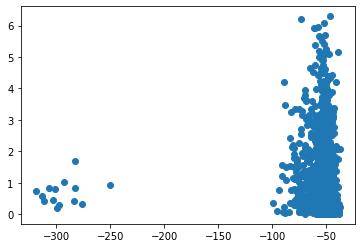

In [15]:
plt.plot(df2['C3_beta_power'], df2['mep_size'], 'o')

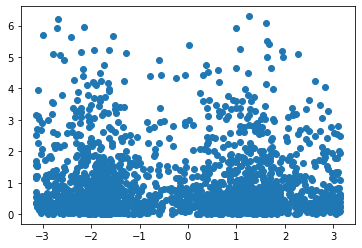

In [16]:
plt.plot(df2['C3_beta_phase'], df2['mep_size'], 'o')

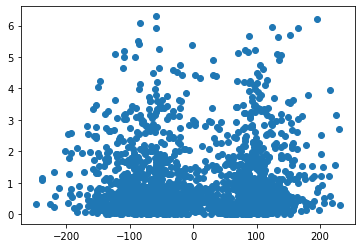

In [17]:
plt.plot(df2['C3_beta_phase'] * df2['C3_beta_power'], df2['mep_size'], 'o')

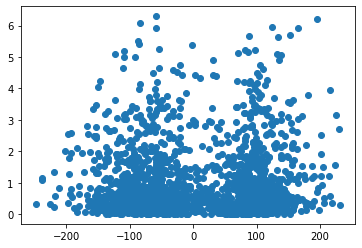

In [20]:
df3 = df2[df2['C3_beta_power'] > -200]
plt.plot(df3['C3_beta_phase'] * df3['C3_beta_power'], df3['mep_size'], 'o')

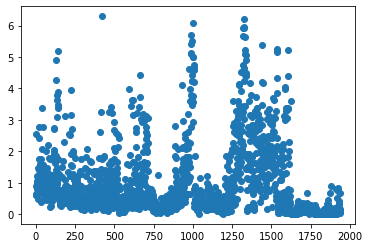

In [29]:
plt.plot(df3['mep_size'], 'o')

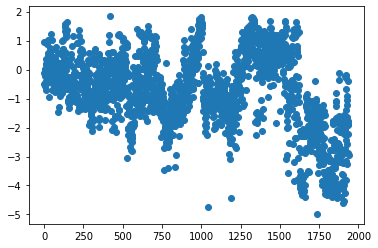

In [30]:
plt.plot(np.log(df3['mep_size']), 'o')

(array([ 15.,  71.,  48., 106., 212., 389., 380., 333., 260., 110.]),
 array([-4.98117358, -4.29907802, -3.61698246, -2.9348869 , -2.25279134,
        -1.57069577, -0.88860021, -0.20650465,  0.47559091,  1.15768648,
         1.83978204]),
 <a list of 10 Patch objects>)

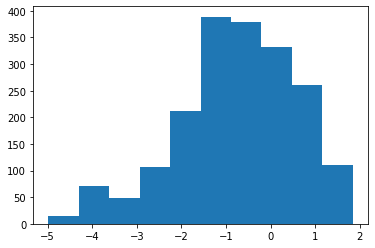

In [31]:
plt.hist(np.log(df3['mep_size']))

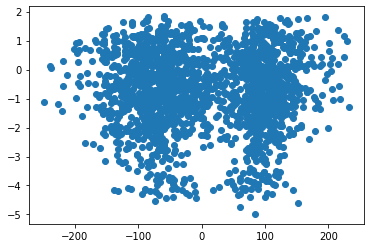

In [32]:
plt.plot(df2['C3_beta_phase'] * df2['C3_beta_power'], np.log(df2['mep_size']), 'o')

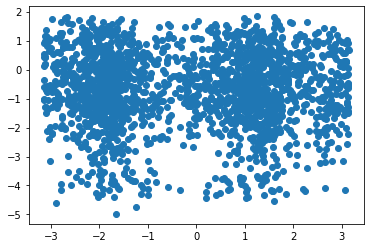

In [33]:
plt.plot(df2['C3_beta_phase'], np.log(df2['mep_size']), 'o')